# Understanding Cross Entropy Loss
[Reference1](https://gombru.github.io/2018/05/23/cross_entropy_loss/)<br/>
[Reference2](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Cross-Entropy Loss

### Tasks
1. Binary Classifcation
2. Multi-Class Classification
3. Multi-Label Classification

### Generic Cross-Entropy function

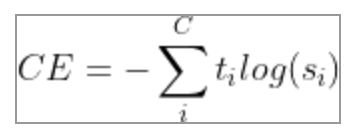

<br/>
C is the number of classes, t_i is ground trutuh, s_i is the prediction for class i. The predicition is a vector of size C.

For a binary classification, it looks like -
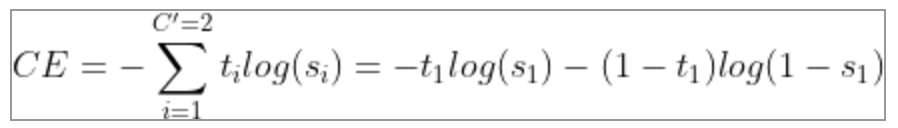

Here, t1 and s1 are probability of first class and 1-t1 and 1-s1 is the probability of class 2.

<br/>

https://datascience.stackexchange.com/questions/9302/the-cross-entropy-error-function-in-neural-networks


Logistic Loss and Multinomial Logistic Loss are other names for Cross-Entropy loss

### Categorical Cross-Entropy loss

Softmax activation function followed by Cross-Entropy loss used for multi-class classification problems.

<br/>

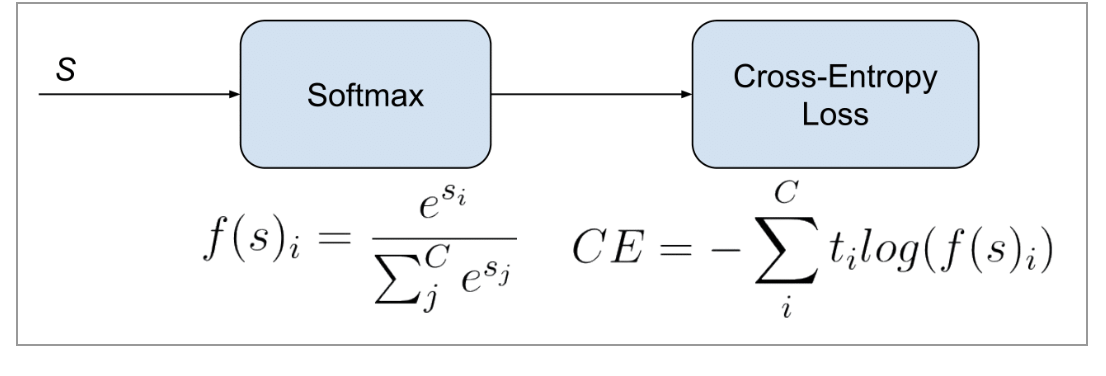

used in Multi-Class classification, labels are one-hot encoded. Only positive-term C_p keeps its term in the loss as rest all values in the target vector will be 0.

<br/>

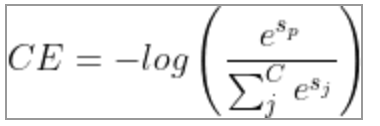

### Binary Cross-Entropy Loss

Sigmoid activation function followed by Cross-Entropy Loss

**Unlike Softmax loss it is independent for each vector component (class), meaning that the loss computed for every CNN output vector component is not affected by other component values. That’s why it is used for multi-label classification, were the insight of an element belonging to a certain class should not influence the decision for another class.**

It’s called Binary Cross-Entropy Loss because it sets up a binary classification problem between 
C′=2 classes for every class in C, as explained above.

<br/>

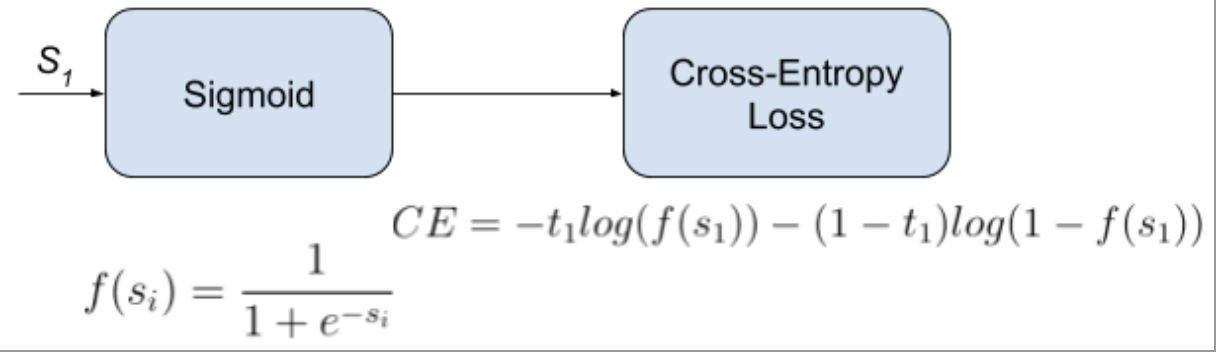

So for each class, calcualte the above value by treating them as independent binary classification problems and sum up the loss to get the cumulative loss. Gradients are also summed while propagating. 

### Focal Loss
Weighted Binary Cross Entropy loss where correctly classified samples are given lower weight using a focussing parameter.

<br/>

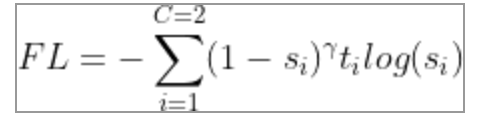

<br/>

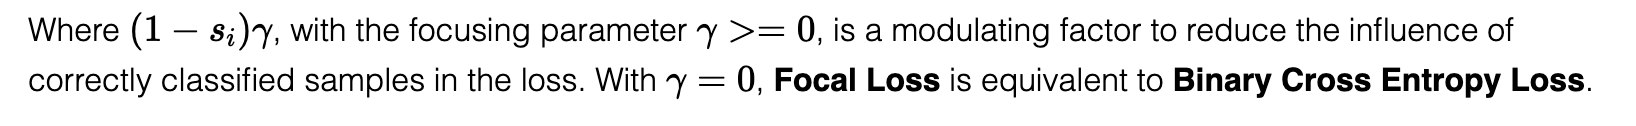

## Implementation and Visualization

### Binary Cross-Entropy Loss

In [2]:
def sigmoid(z): 
    return 1.0 / (1.0 + np.exp(-z)) 

def binary_cross_entropy_loss(yHat, y): 
    if y == 1: 
        return -np.log(yHat) 
    else: 
        return -np.log(1 - yHat)

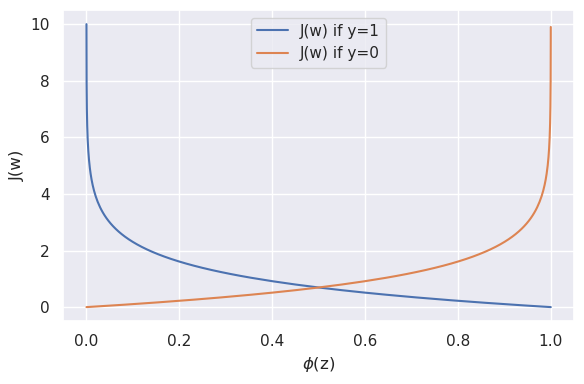

In [3]:
# # Calculate sample values for Z # 
z = np.arange(-10, 10, 0.1) 
# # Calculate the hypothesis value / probability value # 
h_z = sigmoid(z) 
# # Value of cost function when y = 1 # -log(h(x)) # 
cost_1 = binary_cross_entropy_loss(h_z, 1) 
# # Value of cost function when y = 0 # -log(1 - h(x)) # 
cost_0 = binary_cross_entropy_loss(h_z, 0) 
# # Plot the cross entropy loss # 
fig, ax = plt.subplots(figsize=(6,4)) 
plt.plot(h_z, cost_1, label='J(w) if y=1') 
plt.plot(h_z, cost_0, label='J(w) if y=0') 
plt.xlabel('$\phi$(z)') 
plt.ylabel('J(w)') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.show()

### Categorical Cross Entropy Loss

In [4]:
def categorical_cross_entropy(targets, preds):
    targets = np.float_(targets)
    preds = np.float_(preds)
    losses = []
    # iterating through all samples.
    for t,p in zip(targets, preds):
        # calculating loss for a sample. it is at a vector level.
        loss = -np.sum(t * np.log(p))
        losses.append(loss)
        print(f't:{t}, p:{p},loss:{loss}\n')
    return np.sum(losses)

In [5]:
targets = [[1,0,0], [0,1,0], [0,0,1], [1,0,0]]
# output of the softmax activation function, where all the values in pred vector sum up to 1.
preds = [[0.91,0.04,0.05], [0.11,0.8,0.09], [0.3,0.1,0.6], [0.25,0.4,0.35]]
categorical_cross_entropy(targets, preds)

t:[1. 0. 0.], p:[0.91 0.04 0.05],loss:0.09431067947124129

t:[0. 1. 0.], p:[0.11 0.8  0.09],loss:0.2231435513142097

t:[0. 0. 1.], p:[0.3 0.1 0.6],loss:0.5108256237659907

t:[1. 0. 0.], p:[0.25 0.4  0.35],loss:1.3862943611198906



2.214574215671332

# Understanding Ranking Loss

[Reference](https://gombru.github.io/2019/04/03/ranking_loss/)

Unlike other loss functions, such as Cross-Entropy Loss, where objective is to learn to predict directly a label, a value, or a set or values given an input, the objective of Ranking Losses is to predict relative distances between inputs. This task if often called metric learning.

#### Different names - Contrastive Loss, Margin Loss, Hinge Loss or Triplet Loss.

> To use a Ranking Loss function we first extract features from two (or three) input data points and get an embedded representation for each of them. Then, we define a metric function to measure the similarity between those representations, for instance euclidian distance. Finally, we train the feature extractors to produce similar representations for both inputs, in case the inputs are similar, or distant representations for the two inputs, in case they are dissimilar.
> We don’t even care about the values of the representations, only about the distances between them. However, this training methodology has demonstrated to produce powerful representations for different tasks.



## Pairwise Ranking Loss

Positive and negative pairs used. 

* Positive pair - (x1, xp) where xp is similar to x1
* Negative pair - (x1, xn) where xn is disimmilar to x1

**Objective for learning -> Learn small distance d (0) for positive pairs and large distanced d (more than a margin m) for negative pairs.**

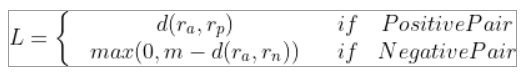

Loss will be 0 for positive pairs when there's no distance between their embedding representations. For negative pairs, loss will be 0 when distance is greater than margin m.

Loss function, y = 1 for positive pair and 0 for negative. 

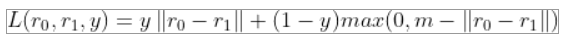

In case of positive pairs, first term is considered and the  loss is equal to the distance between the representations.

In case of negative pairs, the second term is considered and the loss is equal to 0 when distance is greater than m (basically margin function doesn't care about the distance once it more than the margin) and positive and when the distance is less than m.

Basically, in both the cases loss would be minimised as the objective.


## Triplet Ranking Loss

